In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


%matplotllib inline

##  Data review and cleaning

In [3]:
df=pd.read_csv('./data/pima-data.csv')

In [4]:
df.shape


(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [7]:
df.isnull().values.any()

False

In [23]:
def cor_plot(df,size=15):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)


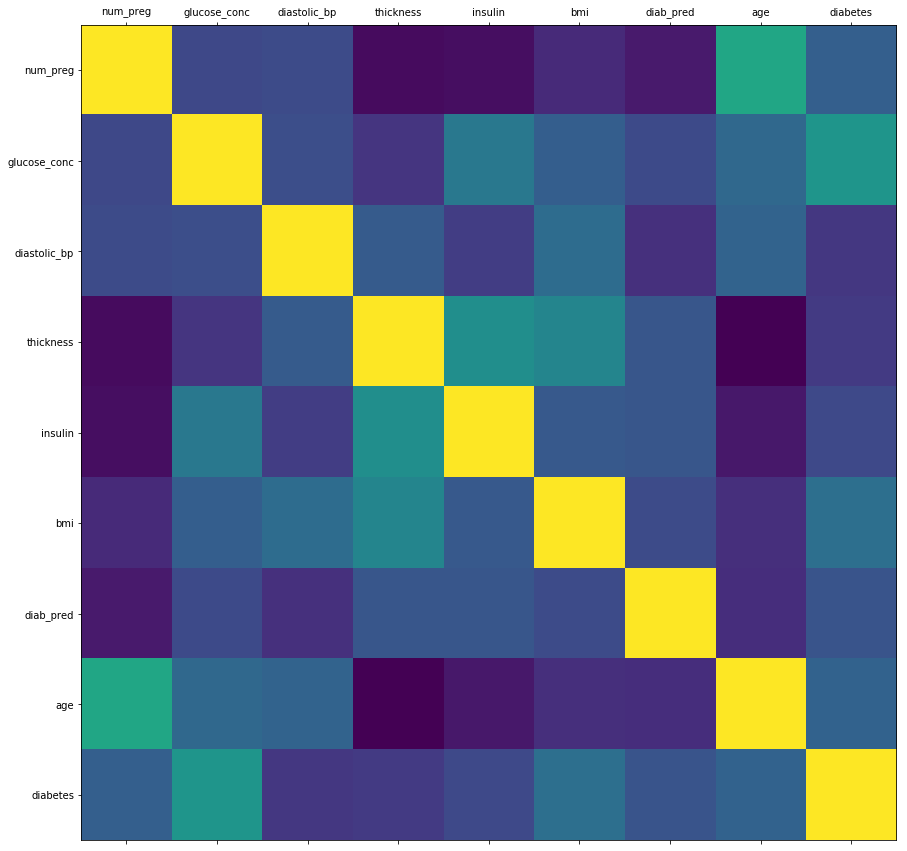

In [24]:
cor_plot(df)


In [16]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [17]:
del df['skin']

In [18]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [20]:
dibties_map={True:1,False :0}

In [21]:
df['diabetes']=df['diabetes'].map(dibties_map)

In [22]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
num_true=len(df.loc[df['diabetes']==True])
num_false=len(df.loc[df['diabetes']==False])

print("No of True cases : {0}  ({1:2.2f}%)".format(num_true,(num_true)/(num_true+num_false)*100))
print('No of False cases {0} ({1:2.2f}%)'.format(num_false,num_false/(num_true+num_false)*100))

No of True cases : 268  (34.90%)
No of False cases 500 (65.10%)


In [51]:
from sklearn.cross_validation import train_test_split

feature_column_names=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predictied_class_name=['diabetes']

x=df[feature_column_names].values
y=df[predictied_class_name].values

split_test_size=0.30


x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=split_test_size,random_state=42)


In [52]:
print("{0:0.2f} is on Training Set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f} is on Testing Set".format((len(X_test)/len(df.index))*100))

69.92 is on Training Set
30.08 is on Testing Set


In [53]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
from sklearn.preprocessing import Imputer
fill_0=Imputer(missing_values=0, strategy='mean' ,axis=0)
x_train=fill_0.fit_transform(x_train)
X_test=fill_0.fit_transform(X_test)

In [61]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB(priors=None)

In [66]:
nb_predictTrain=nb_model.predict(x_train)
from sklearn import metrics

print("Accuracy {0:.4f} %".format((metrics.accuracy_score(y_train,nb_predictTrain))*100))


Accuracy 75.4190 %


In [67]:
nb_predictTrain=nb_model.predict(X_test)
from sklearn import metrics

print("Accuracy {0:.4f} %".format((metrics.accuracy_score(y_test,nb_predictTrain))*100))

Accuracy 73.5931 %
